<a href="https://colab.research.google.com/github/NSR9/EVA8/blob/main/Session-4/S4_step_1_code_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Target: 
1. Code set up
2. Setting up dataloaders
3. Dataset inspection
4. defining a model and model summary
5. Test and Train function definitions
6. Training loop definition
7. Training/Test accuracies and losses plot

## Results:
1. Best Training Accuracy : 99.96% at 15th Epoch
2. Best Test Accuracy : 99.28% at 15th Epoch
3. Params: 6.3 M

##Analysis:
1. Very heavy model for just solving a MNIST classification problem
2. Model is overfitting and connot be trained further to acheive the target of 99.4% on test set

## CALLING THE GODS!

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Model Definition

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)     # 28x28 >> 28x28 Rf = 3
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)    # 28x28 >> 28x28 Rf = 5
        self.pool1 = nn.MaxPool2d(2, 2)                 # 28x28 >> 14x14 Rf = 6
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)   # 14x14 >> 14x14 Rf = 10
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)  # 14x14 >> 14x14 Rf = 14
        self.pool2 = nn.MaxPool2d(2, 2)                 # 14X14 >> 7x7   Rf = 16
        self.conv5 = nn.Conv2d(256, 512, 3)             # 7X7 >> 5x5     Rf = 24
        self.conv6 = nn.Conv2d(512, 1024, 3)            # 5x5 >> 3x3     Rf = 32
        self.conv7 = nn.Conv2d(1024, 10, 3)             # 3x3 >> 1x1     Rf = 40

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        x = F.relu(self.conv7(x))
        x = x.view(-1, 10)
        return F.log_softmax(x)

## Model Summary 

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 

<ipython-input-2-98102ba2721d>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Initializing Data Transformation objects for Train and Test data

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## Initializing Train and Test dataloders for MNIST Dataset

In [ ]:

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


## Inspecting the Train data

torch.Size([128, 1, 28, 28])
torch.Size([128])


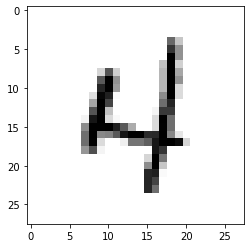

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

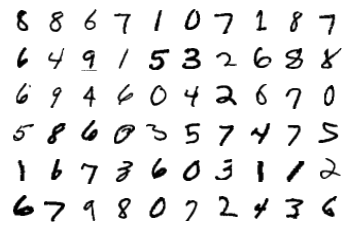

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Train and Test Definitions

In [ ]:
from tqdm import tqdm

train_losses = []
train_accs = []
test_losses = []
test_accs= []

def train(model, device, train_loader, optimizer, epoch):
    correct_preds = 0
    processed = 0
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        # Porting the data and targets in to the GPU
        data, target = data.to(device), target.to(device)

        # setting all the gradients to zero
        optimizer.zero_grad()

        # Predict
        output = model(data)

        # Loss calculation 
        loss = F.nll_loss(output, target)
        train_losses.append(loss)

        # Back propogation
        loss.backward()

        # Updating the weights with calculated gradients
        optimizer.step()

        # Calculating the correct number of predictions
        preds = output.argmax(dim=1, keepdim=True)
        correct_preds += preds.eq(target.view_as(preds)).sum().item()
        processed += len(data)
        
        # Logging the results using Pbar
        pbar.set_description(desc= f'Epoch={epoch} Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct_preds/processed:0.2f}')

        # Appending the training accuracies to the train_accs[]
        train_accs.append(100*correct_preds/processed)
        


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Porting the data and targets in to the GPU
            data, target = data.to(device), target.to(device)

            # Predict 
            output = model(data)

            # Test loss calculation
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_accs.append(100. * correct / len(test_loader.dataset))

## Training and Test loops

In [ ]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
num_epochs = 15
for epoch in range(0, num_epochs):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]<ipython-input-2-98102ba2721d>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Epoch=0 Loss=0.08738163858652115 Batch_id=468 Accuracy=75.92: 100%|██████████| 469/469 [00:04<00:00, 98.37it/s]



Test set: Average loss: 0.0655, Accuracy: 9783/10000 (97.83%)



Epoch=1 Loss=0.011484731920063496 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:04<00:00, 106.16it/s]



Test set: Average loss: 0.0619, Accuracy: 9794/10000 (97.94%)



Epoch=2 Loss=0.042775075882673264 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:04<00:00, 109.44it/s]



Test set: Average loss: 0.0330, Accuracy: 9886/10000 (98.86%)



Epoch=3 Loss=0.008236811496317387 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:04<00:00, 108.12it/s]



Test set: Average loss: 0.0288, Accuracy: 9910/10000 (99.10%)



Epoch=4 Loss=0.003850487992167473 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:04<00:00, 108.98it/s]



Test set: Average loss: 0.0262, Accuracy: 9912/10000 (99.12%)



Epoch=5 Loss=0.002510661259293556 Batch_id=468 Accuracy=99.52: 100%|██████████| 469/469 [00:04<00:00, 111.22it/s]



Test set: Average loss: 0.0278, Accuracy: 9911/10000 (99.11%)



Epoch=6 Loss=0.0007708804332651198 Batch_id=468 Accuracy=99.64: 100%|██████████| 469/469 [00:04<00:00, 109.02it/s]



Test set: Average loss: 0.0313, Accuracy: 9902/10000 (99.02%)



Epoch=7 Loss=0.03322327882051468 Batch_id=468 Accuracy=99.76: 100%|██████████| 469/469 [00:04<00:00, 112.14it/s]



Test set: Average loss: 0.0374, Accuracy: 9889/10000 (98.89%)



Epoch=8 Loss=0.006953474599868059 Batch_id=468 Accuracy=99.80: 100%|██████████| 469/469 [00:04<00:00, 110.29it/s]



Test set: Average loss: 0.0318, Accuracy: 9909/10000 (99.09%)



Epoch=9 Loss=0.0014768807450309396 Batch_id=468 Accuracy=99.81: 100%|██████████| 469/469 [00:04<00:00, 105.72it/s]



Test set: Average loss: 0.0354, Accuracy: 9911/10000 (99.11%)



Epoch=10 Loss=0.019169718027114868 Batch_id=468 Accuracy=99.84: 100%|██████████| 469/469 [00:04<00:00, 111.19it/s]



Test set: Average loss: 0.0297, Accuracy: 9921/10000 (99.21%)



Epoch=11 Loss=0.008621319197118282 Batch_id=468 Accuracy=99.85: 100%|██████████| 469/469 [00:04<00:00, 110.12it/s]



Test set: Average loss: 0.0298, Accuracy: 9924/10000 (99.24%)



Epoch=12 Loss=0.0004403141501825303 Batch_id=468 Accuracy=99.93: 100%|██████████| 469/469 [00:04<00:00, 109.48it/s]



Test set: Average loss: 0.0310, Accuracy: 9924/10000 (99.24%)



Epoch=13 Loss=3.675830157590099e-05 Batch_id=468 Accuracy=99.95: 100%|██████████| 469/469 [00:04<00:00, 111.13it/s]



Test set: Average loss: 0.0332, Accuracy: 9918/10000 (99.18%)



Epoch=14 Loss=0.0009329959866590798 Batch_id=468 Accuracy=99.96: 100%|██████████| 469/469 [00:04<00:00, 110.13it/s]



Test set: Average loss: 0.0330, Accuracy: 9928/10000 (99.28%)



In [ ]:
import numpy 
train_losses = [i.cpu().detach().numpy() for i in train_losses]

In [ ]:

test_losses = [i for i in test_losses]
train_accs = [i for i in train_accs]
test_accs = [i for i in test_accs]


## Training and testing Curves

Text(0.5, 1.0, 'Test Accuracy')

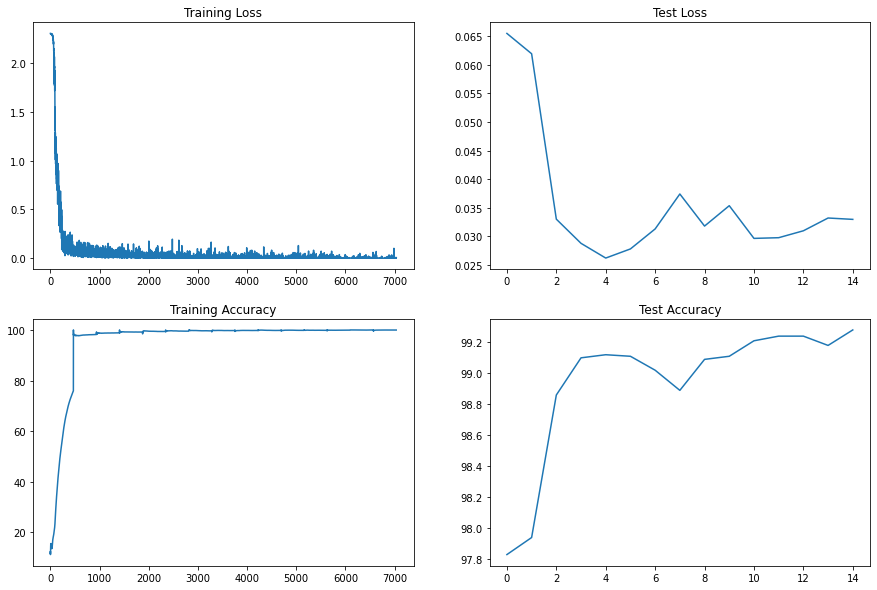

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_accs)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_accs)
axs[1, 1].set_title("Test Accuracy")